<a href="https://colab.research.google.com/github/gashawmg/atom-and-bond-features-from-molecule/blob/main/Accessing%20atoms%20and%20bonds%20%20of%20a%20molecule%20using%20RDKit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="background-color:lightgreen; border-style: double;border-color: #00beef;text-align:center;color:blue;font-size:25px;border-radius: 50px;padding: 20px 20px; font-family:Raleway;"><strong> Gashaw M. Goshu, Ph.D. in Chemistry</strong></div>

In [1]:
!pip install rdkit-pypi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 14.7 MB/s eta 0:00:00


<div style="text-align:left;color:darkblue;font-size:20px; padding: 20px 20px;"><strong> Generating a molecular graph in RDKit, and accessing its atoms and bonds </strong></div>

Reference: RdKit [documentation](https://www.rdkit.org/docs/GettingStartedInPython.html)

In [2]:
# ----------------------------------
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
# --- ------------------------------
import numpy as np
import pandas as pd

# Molecular Representation

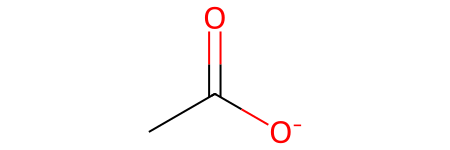

In [3]:
# Molecular graph
mol= Chem.MolFromSmiles('CC(=O)[O-]')
mol

## 1. Accessing atoms and their features from a molecular graph
Atom has :
* symbol, 
* index,
* atomic number,
* atomic mass, 
* hybridization and so on.

In [4]:
# Get atomic number 
mol.GetAtoms()[0].GetAtomicNum()

6

## Need to use a for loop

In [5]:
# Accessing atomic symbol 
atom_symbols = []

for atom in mol.GetAtoms():
    atom_symbols.append(atom.GetSymbol())

In [6]:
atom_symbols

['C', 'C', 'O', 'O']

In [7]:
# Accessing atomic symbols

atm_symbols = [atom.GetSymbol() for atom in mol.GetAtoms()]
atm_symbols

['C', 'C', 'O', 'O']

In [8]:
# Calculate the total number hydrogens

nub_hydrogens = [atom.GetTotalNumHs(includeNeighbors=True) for atom in mol.GetAtoms()]
nub_hydrogens

[3, 0, 0, 0]

In [9]:
# Informatin about Atoms

for atom in mol.GetAtoms():
    print(atom.GetIdx(),
          atom.GetSymbol(), 
          atom.GetAtomicNum(),
          atom.GetMass(),
          atom.GetHybridization(),
          atom.GetFormalCharge(),
          atom.GetDegree(),
          atom.GetTotalNumHs(includeNeighbors=True),
          atom.GetExplicitValence(),
          atom.GetIsAromatic())

0 C 6 12.011 SP3 0 1 3 1 False
1 C 6 12.011 SP2 0 3 0 4 False
2 O 8 15.999 SP2 0 1 0 2 False
3 O 8 15.999 SP2 -1 1 0 1 False


##  2. Accessing bonds from a molecule


In [10]:
# Accessing single, double and triple bonds

[bond.GetBondTypeAsDouble() for bond in mol.GetBonds()]

[1.0, 2.0, 1.0]

In [11]:
# Informatin about Bonds

for bond in mol.GetBonds():
    print(bond.GetBondTypeAsDouble(),
          bond.GetBeginAtomIdx(), 
          bond.GetEndAtomIdx(), 
          bond.IsInRing())

1.0 0 1 False
2.0 1 2 False
1.0 1 3 False


## 3. Calculate some molecular properties

In [12]:
# Define a function

def property_calc(smiles):
    MWt = []
    logp = []
    tpsa = []
    H_acceptors = []
    H_donors = []
    
    mols = [Chem.MolFromSmiles(smi) for smi in smiles]
    for mol in mols:
        # calculate molecular weight 
        mwt = Descriptors.MolWt(mol)
        MWt.append(mwt)
        
        # calculate logp value       
        lgp =  Descriptors.MolLogP(mol)
        logp.append(lgp)
        
        # calculate polar surface area value 
        psa = Descriptors.TPSA(mol)
        tpsa.append(psa)
        
        # calculate hydrogen acceptors
        hba = Descriptors.NumHAcceptors(mol)
        H_acceptors.append(hba)
        
        # calculate hydrogen donors 
        hbd = Descriptors.NumHDonors(mol)
        H_donors.append(hbd)
        
    return MWt,logp, tpsa, H_acceptors, H_donors     

In [13]:
# Some SMILES

smiles = ['C(=O)[O-]','CCC', 'CCO', 'c1ccccc1', 'C1CC(=O)C1']

In [14]:
# Call a function

MWt,logp, tpsa, H_acceptors, H_donors  = property_calc(smiles)

In [15]:
# Values 

MWt,logp, tpsa, H_acceptors, H_donors

([45.017, 44.096999999999994, 46.069, 78.11399999999999, 70.09100000000001],
 [-1.6339000000000001,
  1.4163,
  -0.0014000000000000123,
  1.6866,
  0.7394000000000001],
 [40.129999999999995, 0.0, 20.23, 0.0, 17.07],
 [2, 0, 1, 0, 1],
 [0, 0, 1, 0, 0])

In [16]:
# Use vertical stack 

stacked = np.vstack([smiles, MWt,logp, tpsa, H_acceptors, H_donors]).T
stacked

array([['C(=O)[O-]', '45.017', '-1.6339000000000001',
        '40.129999999999995', '2', '0'],
       ['CCC', '44.096999999999994', '1.4163', '0.0', '0', '0'],
       ['CCO', '46.069', '-0.0014000000000000123', '20.23', '1', '1'],
       ['c1ccccc1', '78.11399999999999', '1.6866', '0.0', '0', '0'],
       ['C1CC(=O)C1', '70.09100000000001', '0.7394000000000001', '17.07',
        '1', '0']], dtype='<U32')

In [17]:
# Columns names

columns = ['SMILES','MW','logp','TPSA','H_acceptors', 'H_donors']

In [18]:
# Put the values in the dataframe

df = pd.DataFrame(data=stacked, columns=columns)
df

,SMILES,MW,logp,TPSA,H_acceptors,H_donors
0,C(=O)[O-],45.017,-1.6339000000000001,40.129999999999995,2,0
1,CCC,44.096999999999994,1.4163,0.0,0,0
2,CCO,46.069,-0.0014000000000000123,20.23,1,1
3,c1ccccc1,78.11399999999999,1.6866,0.0,0,0
4,C1CC(=O)C1,70.09100000000001,0.7394000000000001,17.07,1,0


In [19]:
# All descriptors in RDKit

len(Descriptors._descList)

208

If you wish to calculate all the descriptors available in RDKit click this [video](https://www.youtube.com/watch?v=9i9SY6Nd1Zw&t=60s) or [notebook](https://github.com/gashawmg/molecular-descriptors/blob/main/Molecular%20descriptors.ipynb) 